<a href="https://colab.research.google.com/github/Abhinav4518/Abhinav4518/blob/main/Regression(DL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2025-08-25 11:23:11--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2025-08-25 11:23:11 (34.9 MB/s) - ‘moore.csv’ saved [2302/2302]



In [3]:
!ls

moore.csv  sample_data


In [4]:
#Load the data
data=pd.read_csv('moore.csv',header=None).to_numpy()

In [5]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

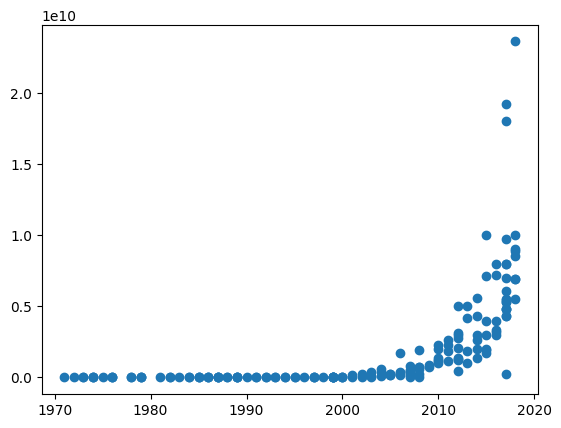

In [6]:
X=data[:,0].reshape(-1,1)#making N*D data
Y=data[:,1]
plt.scatter(X,Y);

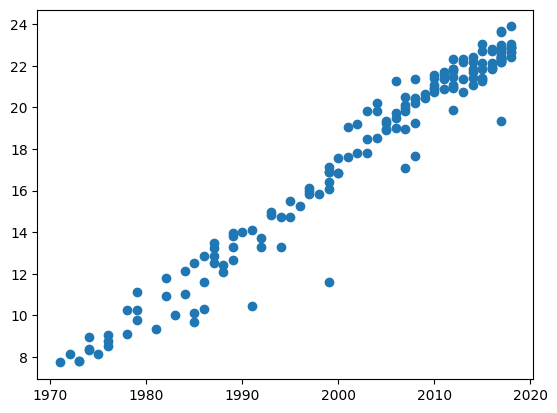

In [7]:
Y=np.log(Y)
plt.scatter(X,Y)

In [8]:
X=X-X.mean()

In [9]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

In [10]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9),
    loss='mse',
)

In [11]:
def schedule(epoch,lr):
  if epoch >=50:
    return 0.0001
  return 0.001
scheduler=tf.keras.callbacks.LearningRateScheduler(schedule)

In [12]:
r=model.fit(X,Y,epochs=200,callbacks=[scheduler])

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 435.1745 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 354.7122 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 252.5654 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 223.6190 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 213.6625 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 140.9835 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 94.5447 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 65.9358 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 47.7888 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34.6918 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28.4510 - learning_rate: 0.0010
Epoch 12/200


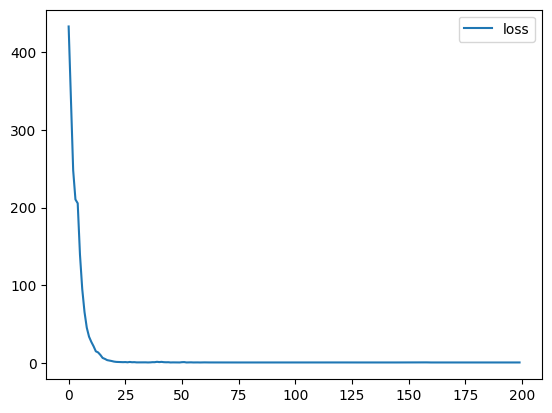

In [13]:
#PLot the loss
plt.plot(r.history['loss'],label='loss')
plt.legend()

In [20]:
model.layers[0].get_weights()

[array([[0.35033786]], dtype=float32), array([17.761148], dtype=float32)]

In [15]:
a=model.layers[0].get_weights()[0]

In [16]:
a

array([[0.35033786]], dtype=float32)

In [17]:
#Original model has exponential growth
#C=A0r^t
#taking log logC=logr*t+logA0

In [18]:
print('Time to double:',np.log(2)/a)

Time to double: [[1.97851061]]


In [19]:
#Analytical Solution
X=X.flatten()
denominator=X.dot(X)-X.mean()*X.sum()
a=(X.dot(Y)-Y.mean()*X.sum())/denominator
b=(Y.mean()*X.dot(X)-X.mean()*X.dot(Y))/denominator
print(a,b)
#value closer to model get weights

0.341682487387313 17.764939393631764


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


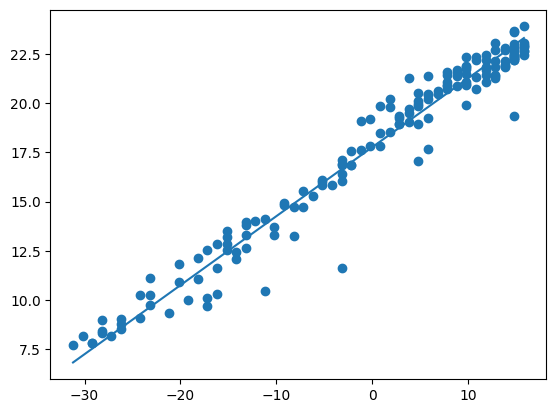

In [21]:
#Making Predictions
Yhat=model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,Yhat)

In [22]:
#Get the weights
w,b=model.layers[0].get_weights()
#Reshape because we flattened it earlier
X=X.reshape(-1,1)
Yhat2=(X.dot(w)+b).flatten()
#Don't use == for floating values
np.allclose(Yhat,Yhat2)

True